In [89]:
# initialize
import mne
import os
import scipy.io
import numpy as np
from numpy import linspace,cos,pi,ceil,floor,arange
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal
from scipy import stats
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
from itertools import permutations,combinations
from IPython.display import clear_output
import seaborn as sns
from scipy.linalg import toeplitz
from numpy import linalg as LA
from mne.event import define_target_events
from operator import itemgetter 


In [90]:

from copy import copy
import sys

In [91]:
with open('Alice_eegEMAdownsampled_100.pkl', 'rb') as f:
    x = pickle.load(f)

In [92]:
x

,trialno,eeg,eegTime,filename,response,RT,condition,envelop,phonemeRate,phonemeDuration,...,Trial_len,jawaopening,lipaparature,lipProtrusion,TBCD,TMCD,TTCD,TB_ui,TM_ui,TT_ui
0,1,"[[2.2243974556538713, 12.404519333926135, 16.2...","[3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...",olm_26_1,0,1327.0,1,"[-0.00010037155361867451, 0.000164169546234248...",11.686747,0.085642,...,8.3,"[0.032319593219340643, 0.033705886895497486, 0...","[0.019498594794729405, 0.01924270175323214, 0....","[0.02001806774544584, 0.016975783885240864, 0....","[0.030597250427387437, 0.048810026970132904, 0...","[0.04017631924864266, 0.05811813941909484, 0.0...","[0.050404742323600545, 0.08352384441501484, 0....","[0.0380267569001387, 0.041380816423382226, 0.0...","[0.038759114322139104, 0.046256907827073646, 0...","[0.04510932512842603, 0.06394771444002059, 0.0..."
1,2,"[[2.0044986480941125, -3.5249477280523562, -2....","[0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....",olm_56_7,0,1167.0,3,"[0.000540998020782738, -8.187566008573984e-05,...",18.771331,0.053214,...,2.93,"[0.06393302741898052, 0.07204162076304013, 0.0...","[0.06123737820627736, 0.08257737389021504, 0.0...","[0.051385032943965625, 0.055807209445187515, 0...","[0.05494643513980542, 0.07211006322425169, 0.0...","[0.07307940894640423, 0.10418823651179608, 0.0...","[0.09660915886884412, 0.15452395854788464, 0.1...","[0.061439347804017753, 0.06568484102189526, 0....","[0.06479837278823862, 0.07695793696666388, 0.0...","[0.0812455202639574, 0.11427208321893448, 0.10..."
2,3,"[[-1.989579581775545, -6.713491982603861, -1.6...","[1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....",n_olm_361,0,1779.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
3,4,"[[3.65729098302815, 12.382125161052995, 9.2093...","[1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....",n_olm_361,0,1278.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
4,5,"[[1.475924575636111, -0.7942308971427563, -0.1...","[0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...",n_olm_254,0,1313.0,2,"[0.00027293296265098815, 0.0010151522834784682...",10.970464,0.091115,...,2.37,"[0.06309553936610532, 0.0646737461135028, 0.06...","[0.05597704523663049, 0.07668386769209459, 0.0...","[0.02598783499109089, 0.038622826480820896, 0....","[0.04023482805911612, 0.056175722703717006, 0....","[0.03321678557641088, 0.03788815851263843, 0.0...","[0.02230863348217216, 0.020608013450270773, 0....","[0.05742501655061877, 0.05801960977354825, 0.0...","[0.051977138844317684, 0.0517548400227059, 0.0...","[0.05190624756650298, 0.05214771801136161, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,195,"[[-1.6396336092806718, 2.6278609778943354, 2.3...","[1.0885, -1.042, -0.489, -0.8, -0.5619, -0.728...",olm_43_7,0,1425.0,3,"[0.00021163169722020227, 0.0011062347915636922...",16.717325,0.059945,...,3.29,"[0.0552262772307175, 0.05885065221252121, 0.05...","[0.05350279443242076, 0.06497286148620109, 0.0...","[0.05765888488895267, 0.065502672279007

In [93]:
feat = pd.read_pickle('Alice_eegEMAdownsampled_100.pkl')

In [94]:
feat.reset_index(drop=True, inplace=True)
feat.head()

,trialno,eeg,eegTime,filename,response,RT,condition,envelop,phonemeRate,phonemeDuration,...,Trial_len,jawaopening,lipaparature,lipProtrusion,TBCD,TMCD,TTCD,TB_ui,TM_ui,TT_ui
0,1,"[[2.2243974556538713, 12.404519333926135, 16.2...","[3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...",olm_26_1,0,1327.0,1,"[-0.00010037155361867451, 0.000164169546234248...",11.686747,0.085642,...,8.3,"[0.032319593219340643, 0.033705886895497486, 0...","[0.019498594794729405, 0.01924270175323214, 0....","[0.02001806774544584, 0.016975783885240864, 0....","[0.030597250427387437, 0.048810026970132904, 0...","[0.04017631924864266, 0.05811813941909484, 0.0...","[0.050404742323600545, 0.08352384441501484, 0....","[0.0380267569001387, 0.041380816423382226, 0.0...","[0.038759114322139104, 0.046256907827073646, 0...","[0.04510932512842603, 0.06394771444002059, 0.0..."
1,2,"[[2.0044986480941125, -3.5249477280523562, -2....","[0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....",olm_56_7,0,1167.0,3,"[0.000540998020782738, -8.187566008573984e-05,...",18.771331,0.053214,...,2.93,"[0.06393302741898052, 0.07204162076304013, 0.0...","[0.06123737820627736, 0.08257737389021504, 0.0...","[0.051385032943965625, 0.055807209445187515, 0...","[0.05494643513980542, 0.07211006322425169, 0.0...","[0.07307940894640423, 0.10418823651179608, 0.0...","[0.09660915886884412, 0.15452395854788464, 0.1...","[0.061439347804017753, 0.06568484102189526, 0....","[0.06479837278823862, 0.07695793696666388, 0.0...","[0.0812455202639574, 0.11427208321893448, 0.10..."
2,3,"[[-1.989579581775545, -6.713491982603861, -1.6...","[1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....",n_olm_361,0,1779.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
3,4,"[[3.65729098302815, 12.382125161052995, 9.2093...","[1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....",n_olm_361,0,1278.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
4,5,"[[1.475924575636111, -0.7942308971427563, -0.1...","[0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...",n_olm_254,0,1313.0,2,"[0.00027293296265098815, 0.0010151522834784682...",10.970464,0.091115,...,2.37,"[0.06309553936610532, 0.0646737461135028, 0.06...","[0.05597704523663049, 0.07668386769209459, 0.0...","[0.02598783499109089, 0.038622826480820896, 0....","[0.04023482805911612, 0.056175722703717006, 0....","[0.03321678557641088, 0.03788815851263843, 0.0...","[0.02230863348217216, 0.020608013450270773, 0....","[0.05742501655061877, 0.05801960977354825, 0.0...","[0.051977138844317684, 0.0517548400227059, 0.0...","[0.05190624756650298, 0.05214771801136161, 0.0..."


In [95]:
feat['eeg'][0][1]

array([ 1.16234821e+00,  1.60390370e+01,  1.17999714e+01,  1.71417477e+01,
        1.36510110e+01,  1.09018393e+01,  1.15954102e+01,  1.58068761e+01,
        1.38130861e+01,  1.34918869e+01,  1.49301631e+01,  1.92670488e+01,
        1.53937835e+01,  9.60631776e+00,  9.13542450e+00,  1.42468589e+01,
        1.42772157e+01,  1.20820986e+01,  9.95843538e+00,  9.50173684e+00,
        8.40228857e+00,  8.77834982e+00,  1.03243526e+01,  1.56836513e+01,
        1.86490751e+01,  1.66070846e+01,  1.36171887e+01,  1.70995989e+01,
        2.10503839e+01,  2.37662575e+01,  2.51394800e+01,  2.43701034e+01,
        1.93975724e+01,  1.84888840e+01,  2.04081485e+01,  2.13030464e+01,
        1.91017382e+01,  1.80146785e+01,  1.79016624e+01,  1.72014958e+01,
        1.46603591e+01,  1.71521394e+01,  1.90986886e+01,  1.68300859e+01,
        1.44666198e+01,  1.54522923e+01,  1.69159849e+01,  1.88342533e+01,
        1.66336718e+01,  1.35542398e+01,  1.29156011e+01,  1.34680574e+01,
        1.41632285e+01,  

In [96]:
data_path = os.path.dirname(os.path.dirname(os.getcwd()))

In [97]:
data_path

'C:\\Users'

In [98]:
save_path = data_path + '\PREMENDU\mne_data'

In [99]:
save_path

'C:\\Users\\PREMENDU\\mne_data'

In [100]:
feat['eeg'].shape

(171,)

In [101]:
Arr = feat['eegTime'].iloc[0]

In [102]:
Arr.shape

(890,)

In [103]:
feat['eegTime']

0      [3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...
1      [0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....
2      [1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....
3      [1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....
4      [0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...
                             ...                        
166    [1.0885, -1.042, -0.489, -0.8, -0.5619, -0.728...
167    [0.911, -1.0075, -0.5075, -0.7876, -0.5712, -0...
168    [1.9565, -1.2134, -0.3956, -0.8638, -0.5135, -...
169    [0.8525, -0.9955, -0.5143, -0.7828, -0.5749, -...
170    [1.786, -1.1798, -0.4139, -0.8513, -0.5229, -0...
Name: eegTime, Length: 171, dtype: object

In [104]:
s = feat['eegTime']
s.to_csv("file.csv")

In [105]:
feat['eegTime'].shape

(171,)

In [106]:
feat['eegTime'].iloc[0].shape

(890,)

In [107]:
feat['eeg'].iloc[0].shape

(59, 890)

In [108]:
Arr[0].dtype

dtype('float64')

In [109]:
Arr

array([ 3.3025e+00, -1.4782e+00, -2.5200e-01, -9.6140e-01, -4.3970e-01,
       -8.2690e-01, -4.9240e-01, -7.5670e-01, -5.0920e-01, -7.0860e-01,
       -5.1140e-01, -6.7060e-01, -5.0620e-01, -6.3820e-01, -4.9680e-01,
       -6.0910e-01, -4.8480e-01, -5.8210e-01, -4.7100e-01, -5.5650e-01,
       -4.5600e-01, -5.3210e-01, -4.4010e-01, -5.0840e-01, -4.2350e-01,
       -4.8530e-01, -4.0630e-01, -4.6260e-01, -3.8880e-01, -4.4030e-01,
       -3.7100e-01, -4.1840e-01, -3.5280e-01, -3.9660e-01, -3.3450e-01,
       -3.7510e-01, -3.1600e-01, -3.5370e-01, -2.9730e-01, -3.3240e-01,
       -2.7850e-01, -3.1130e-01, -2.5960e-01, -2.9030e-01, -2.4050e-01,
       -2.6940e-01, -2.2140e-01, -2.4860e-01, -2.0230e-01, -2.2780e-01,
       -1.8300e-01, -2.0710e-01, -1.6370e-01, -1.8640e-01, -1.4440e-01,
       -1.6580e-01, -1.2500e-01, -1.4520e-01, -1.0560e-01, -1.2470e-01,
       -8.6100e-02, -1.0420e-01, -6.6600e-02, -8.3700e-02, -4.7100e-02,
       -6.3300e-02, -2.7500e-02, -4.2900e-02, -7.9000e-03, -2.25

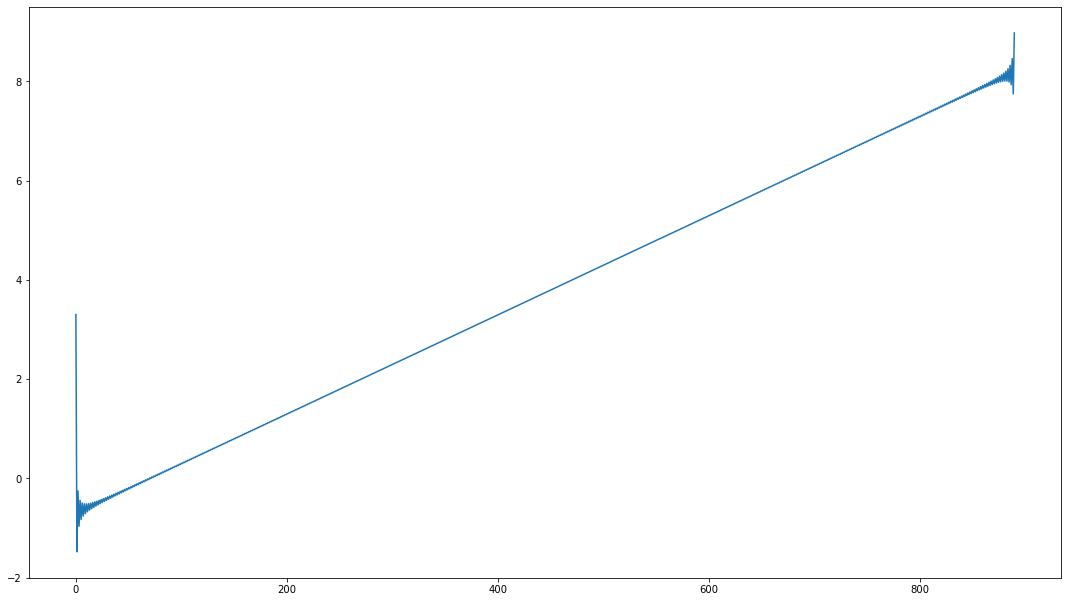

In [110]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(feat['eegTime'].iloc[0])

In [111]:
Arr = Arr[1:]
import numpy as np
RE = np.diff(Arr)
RE
np.mean(RE)

0.011771846846846845

In [112]:
RE= []
for index in range(1,len(Arr)-1):
    RE.append(Arr[index]-Arr[index-1])
RE
    

    

[1.2262,
 -0.7094,
 0.5217,
 -0.3872,
 0.33449999999999996,
 -0.26430000000000003,
 0.24750000000000005,
 -0.19940000000000002,
 0.19720000000000004,
 -0.1592,
 0.1644,
 -0.132,
 0.14139999999999997,
 -0.11229999999999996,
 0.12429999999999997,
 -0.09729999999999994,
 0.11109999999999998,
 -0.08550000000000002,
 0.10049999999999998,
 -0.0761,
 0.09200000000000003,
 -0.06829999999999997,
 0.08489999999999998,
 -0.06180000000000002,
 0.07900000000000001,
 -0.05630000000000002,
 0.07380000000000003,
 -0.051500000000000046,
 0.06930000000000003,
 -0.0474,
 0.06559999999999999,
 -0.043800000000000006,
 0.06209999999999999,
 -0.04059999999999997,
 0.059099999999999986,
 -0.03770000000000001,
 0.056400000000000006,
 -0.035099999999999965,
 0.05389999999999995,
 -0.032799999999999996,
 0.051700000000000024,
 -0.030700000000000005,
 0.04980000000000001,
 -0.02889999999999998,
 0.04799999999999996,
 -0.027199999999999974,
 0.04629999999999998,
 -0.025499999999999995,
 0.044800000000000006,
 -0.0

In [113]:
Arr

array([-1.4782e+00, -2.5200e-01, -9.6140e-01, -4.3970e-01, -8.2690e-01,
       -4.9240e-01, -7.5670e-01, -5.0920e-01, -7.0860e-01, -5.1140e-01,
       -6.7060e-01, -5.0620e-01, -6.3820e-01, -4.9680e-01, -6.0910e-01,
       -4.8480e-01, -5.8210e-01, -4.7100e-01, -5.5650e-01, -4.5600e-01,
       -5.3210e-01, -4.4010e-01, -5.0840e-01, -4.2350e-01, -4.8530e-01,
       -4.0630e-01, -4.6260e-01, -3.8880e-01, -4.4030e-01, -3.7100e-01,
       -4.1840e-01, -3.5280e-01, -3.9660e-01, -3.3450e-01, -3.7510e-01,
       -3.1600e-01, -3.5370e-01, -2.9730e-01, -3.3240e-01, -2.7850e-01,
       -3.1130e-01, -2.5960e-01, -2.9030e-01, -2.4050e-01, -2.6940e-01,
       -2.2140e-01, -2.4860e-01, -2.0230e-01, -2.2780e-01, -1.8300e-01,
       -2.0710e-01, -1.6370e-01, -1.8640e-01, -1.4440e-01, -1.6580e-01,
       -1.2500e-01, -1.4520e-01, -1.0560e-01, -1.2470e-01, -8.6100e-02,
       -1.0420e-01, -6.6600e-02, -8.3700e-02, -4.7100e-02, -6.3300e-02,
       -2.7500e-02, -4.2900e-02, -7.9000e-03, -2.2500e-02,  1.17

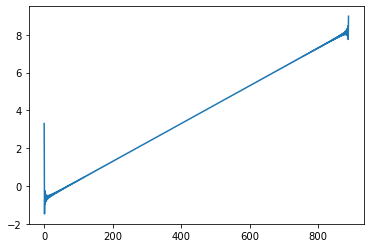

In [114]:

plt.plot(feat['eegTime'].iloc[0])

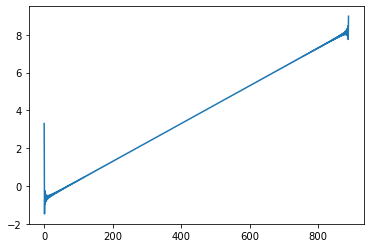

In [115]:
plt.plot(feat['eegTime'].iloc[0])

In [116]:
feat.info

<bound method DataFrame.info of      trialno                                                eeg  \
0          1  [[2.2243974556538713, 12.404519333926135, 16.2...   
1          2  [[2.0044986480941125, -3.5249477280523562, -2....   
2          3  [[-1.989579581775545, -6.713491982603861, -1.6...   
3          4  [[3.65729098302815, 12.382125161052995, 9.2093...   
4          5  [[1.475924575636111, -0.7942308971427563, -0.1...   
..       ...                                                ...   
166      195  [[-1.6396336092806718, 2.6278609778943354, 2.3...   
167      196  [[-0.15020298863300735, 0.030623684665795885, ...   
168      198  [[-4.0706306820188685, -0.3494079009651656, -2...   
169      199  [[3.917968740194692, -0.10624617174654047, -4....   
170      200  [[5.887919018981268, 5.928475955621999, 7.0640...   

                                               eegTime   filename response  \
0    [3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...   olm_26_1        0   
1    [0

In [117]:
np.max(feat['eegTime'].iloc[0])

8.9752

In [118]:
np.min(feat['eegTime'].iloc[0])

-1.4782

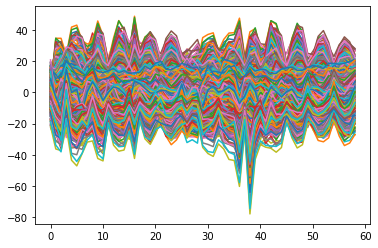

In [119]:
plt.plot(feat['eeg'][0])

In [120]:
feat['eegTime'].iloc[1]

array([ 0.9325, -1.0117, -0.5052, -0.7891, -0.57  , -0.7224, -0.5796,
       -0.6819, -0.5746, -0.6505, -0.5636, -0.6232, -0.5497, -0.5981,
       -0.534 , -0.5744, -0.5172, -0.5516, -0.4998, -0.5294, -0.4818,
       -0.5076, -0.4635, -0.4861, -0.4448, -0.4648, -0.426 , -0.4438,
       -0.407 , -0.4229, -0.3879, -0.4021, -0.3686, -0.3814, -0.3493,
       -0.3608, -0.3299, -0.3402, -0.3104, -0.3197, -0.2909, -0.2993,
       -0.2714, -0.2789, -0.2518, -0.2586, -0.2321, -0.2382, -0.2124,
       -0.2179, -0.1928, -0.1977, -0.173 , -0.1774, -0.1533, -0.1572,
       -0.1335, -0.137 , -0.1138, -0.1168, -0.094 , -0.0966, -0.0742,
       -0.0764, -0.0544, -0.0563, -0.0345, -0.0361, -0.0147, -0.016 ,
        0.0052,  0.0041,  0.025 ,  0.0243,  0.0449,  0.0444,  0.0647,
        0.0645,  0.0846,  0.0846,  0.1045,  0.1047,  0.1244,  0.1247,
        0.1443,  0.1448,  0.1642,  0.1649,  0.1841,  0.185 ,  0.204 ,
        0.205 ,  0.2239,  0.2251,  0.2438,  0.2452,  0.2637,  0.2652,
        0.2837,  0.2

In [121]:
list(feat['eeg'][0][0])

[2.2243974556538713,
 12.404519333926135,
 16.295680128747232,
 18.983998903810857,
 14.037424686747876,
 9.729269056250335,
 10.944293869526286,
 14.843492818113484,
 13.332088040987788,
 10.619392922313788,
 10.209922840613723,
 13.00516035898775,
 11.155837382089253,
 7.247396370292822,
 4.889377093649143,
 6.104588649897703,
 6.68852371708239,
 5.785713035431472,
 2.166434484896878,
 -0.572915360227705,
 -0.49402911614603534,
 0.9028964394356555,
 1.0501806696343035,
 3.7808633861994316,
 7.451207434002617,
 6.486409563600805,
 3.469497881689391,
 5.984842522550692,
 10.915488011851519,
 14.924294630092866,
 16.528649431559273,
 16.29607429988079,
 16.52760437880956,
 17.02156196212886,
 15.47387809521316,
 15.344811670120002,
 15.097422559909615,
 14.536041439186562,
 14.493187975893216,
 14.757607368027484,
 12.003254473231095,
 10.747986910365402,
 12.87017188113638,
 14.622877657933632,
 13.714387194424486,
 12.883481213336127,
 13.240594413907568,
 15.462691575483408,
 15.9607

In [122]:
np.where(Arr==0)

(array([], dtype=int64),)

In [123]:
list(feat['eegTime'][0])

[3.3025,
 -1.4782,
 -0.252,
 -0.9614,
 -0.4397,
 -0.8269,
 -0.4924,
 -0.7567,
 -0.5092,
 -0.7086,
 -0.5114,
 -0.6706,
 -0.5062,
 -0.6382,
 -0.4968,
 -0.6091,
 -0.4848,
 -0.5821,
 -0.471,
 -0.5565,
 -0.456,
 -0.5321,
 -0.4401,
 -0.5084,
 -0.4235,
 -0.4853,
 -0.4063,
 -0.4626,
 -0.3888,
 -0.4403,
 -0.371,
 -0.4184,
 -0.3528,
 -0.3966,
 -0.3345,
 -0.3751,
 -0.316,
 -0.3537,
 -0.2973,
 -0.3324,
 -0.2785,
 -0.3113,
 -0.2596,
 -0.2903,
 -0.2405,
 -0.2694,
 -0.2214,
 -0.2486,
 -0.2023,
 -0.2278,
 -0.183,
 -0.2071,
 -0.1637,
 -0.1864,
 -0.1444,
 -0.1658,
 -0.125,
 -0.1452,
 -0.1056,
 -0.1247,
 -0.0861,
 -0.1042,
 -0.0666,
 -0.0837,
 -0.0471,
 -0.0633,
 -0.0275,
 -0.0429,
 -0.0079,
 -0.0225,
 0.0117,
 -0.0021,
 0.0313,
 0.0182,
 0.051,
 0.0385,
 0.0706,
 0.0588,
 0.0903,
 0.0791,
 0.11,
 0.0994,
 0.1297,
 0.1197,
 0.1495,
 0.1399,
 0.1692,
 0.1602,
 0.1889,
 0.1804,
 0.2087,
 0.2006,
 0.2285,
 0.2208,
 0.2482,
 0.241,
 0.268,
 0.2612,
 0.2878,
 0.2814,
 0.3076,
 0.3016,
 0.3274,
 0.3217,
 0.347

In [124]:
given_value = 0

for i in range(len(feat)):
    a_list = list(feat["eegTime"][i])
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(a_list, key=absolute_difference_function)

    for j in range(len(a_list)):
        if a_list[j] == closest_value:
            print("For row:",i)
            print("Index :",j)
            #print("Corresponding eeg:",feat["eeg"][i][j])
            print("==========")

For row: 0
Index : 71
For row: 1
Index : 71
For row: 2
Index : 71
For row: 3
Index : 71
For row: 4
Index : 70
For row: 5
Index : 71
For row: 6
Index : 71
For row: 7
Index : 71
For row: 8
Index : 70
For row: 9
Index : 71
For row: 10
Index : 71
For row: 11
Index : 71
For row: 12
Index : 71
For row: 13
Index : 71
For row: 14
Index : 71
For row: 15
Index : 71
For row: 16
Index : 71
For row: 17
Index : 71
For row: 18
Index : 71
For row: 19
Index : 71
For row: 20
Index : 71
For row: 21
Index : 71
For row: 22
Index : 71
For row: 23
Index : 71
For row: 24
Index : 71
For row: 25
Index : 71
For row: 26
Index : 71
For row: 27
Index : 71
For row: 28
Index : 71
For row: 29
Index : 71
For row: 30
Index : 71
For row: 31
Index : 71
For row: 32
Index : 71
For row: 33
Index : 70
For row: 34
Index : 71
For row: 35
Index : 71
For row: 36
Index : 71
For row: 37
Index : 71
For row: 38
Index : 71
For row: 39
Index : 71
For row: 40
Index : 71
For row: 41
Index : 70
For row: 42
Index : 71
For row: 43
Index : 7

In [125]:
eeglist[71]

0.5613256161084288

In [126]:
def calculateBaseline(data, baselineDur=0.1, fs=500.0):

    #Calculate and return the baseline (average of each data point) of a signal.
    #The baseline will be calculated from the first `baselineDur` seconds of this
    #signal.
    #Parameters
    #----------
    #data : instance of pandas.core.DataFrame
      #  Data used to calculate the baseline.
   # baselineDur : float
       # Duration of the baseline to use for the calulation of the average in
       # seconds.
    #fs : float
       # Sampling frequency of data in Hz.
    #Returns:
    #baseline : float
        #The baseline value.


    # duration for the baseline calculation is in seconds
    durSamples = int(np.round(baselineDur*fs))
    subData = data[:durSamples]
    baseline = subData.mean()
    return baseline

In [127]:
calculateBaseline(feat)

trialno              28.920000
response              0.000000
RT                 1642.360000
condition             2.000000
phonemeRate          12.721602
phonemeDuration       0.082197
answerIndex           5.440000
answerTime            2.593876
Trial_len             4.473800
dtype: float64

In [128]:
eeglist=list(feat['eeg'][0][0])

In [154]:
add=0
diff=[]
for i in range(1,len(Arr)-1):
    diff = feat['eegTime'][0][i+1] - feat['eegTime'][0][i]
diff


-0.7113999999999994

In [152]:
feat['eegTime'][0][110] - feat['eegTime'][0][109]

0.024500000000000022

In [148]:
feat['eegTime'][0][109] - feat['eegTime'][0][108]

-0.0047000000000000375

In [149]:
feat['eegTime'][0][108] - feat['eegTime'][0][107]

0.024800000000000044

In [150]:
feat['eegTime'][0][74] - feat['eegTime'][0][73]

0.032799999999999996

In [151]:
feat['eegTime'][0][72] - feat['eegTime'][0][71]

0.0334

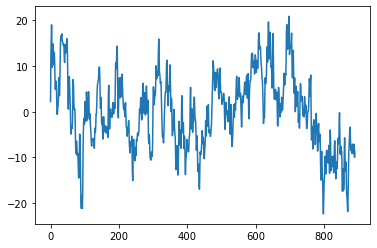

In [129]:
plt.plot(eeglist)

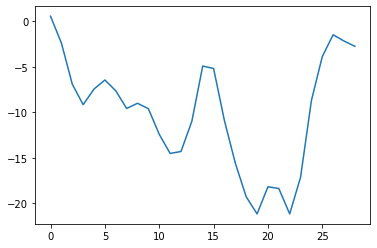

In [130]:
plt.plot(eeglist[71:100])

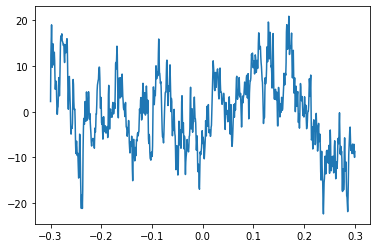

In [131]:
f = 40;  # Hz
tmin = -0.3
tmax = 0.3
t = linspace(tmin, tmax, 890)
plt.plot(t, eeglist)


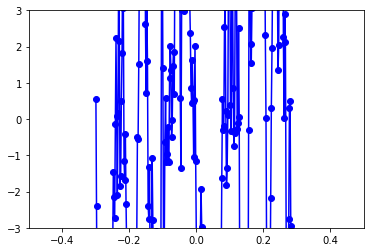

In [132]:
T = 1/500.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);

plt.plot(n*T, eeglist[71:371], '-b.',markersize=12)

plt.axis([-0.5, 0.5, -3.0, 3.0 ])
plt.show()

In [139]:
eeglist[73]

-2.387141721149594

In [133]:
import numpy as np 
import scipy
from scipy import signal
t = np.arange(0, 10)
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

[None]

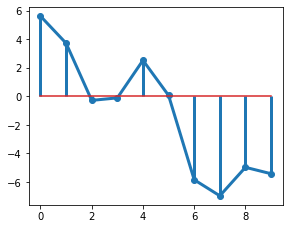

In [134]:
plt.figure(figsize = (10,8))
plt.subplot(2, 2, 2)
#plt.title('Sampling', fontsize=20)
plt.plot(t, eeglist[280:290], linewidth=3)
n = t

markerline, stemlines, baseline = plt.stem(n, eeglist[280:290])
plt.setp(stemlines, 'linewidth', 3)
#plt.xlabel('n' , fontsize = 15)
#plt.ylabel('amplitude', fontsize = 15)
#plt.legend(loc='upper right')

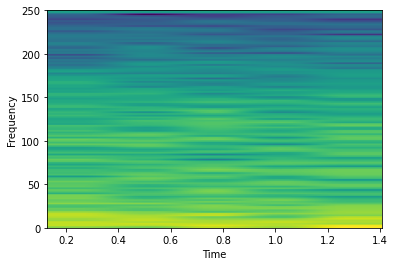

In [135]:
plot.specgram(eeglist,Fs=500.0)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

(array([7.57056009e+00, 7.69551383e+00, 1.90176212e+00, 2.02655625e+00,
        1.14649419e+00, 1.67168540e+00, 1.39027701e+00, 2.02891282e+00,
        1.75460137e+00, 5.57775044e-01, 3.04529524e-01, 3.18728728e-01,
        2.99481695e-01, 2.59860812e-01, 2.09166821e-01, 1.50087544e-01,
        7.14139886e-02, 1.55209749e-01, 9.86507595e-02, 1.23353486e-01,
        6.77041119e-02, 1.31628856e-01, 1.38073136e-01, 5.53444571e-02,
        8.54350589e-02, 9.65016442e-02, 6.55226910e-02, 7.16094161e-02,
        2.06361596e-02, 4.65674298e-02, 5.86994221e-02, 8.01507949e-02,
        6.85017665e-02, 1.18086071e-01, 1.74514602e-01, 6.50898733e-02,
        3.07037388e-02, 2.95017064e-02, 4.39491206e-02, 4.98751712e-02,
        5.21812622e-02, 1.55365973e-02, 3.26264259e-02, 3.47753722e-02,
        5.12399889e-02, 3.42625452e-02, 1.52658961e-02, 9.66772779e-03,
        2.52613530e-02, 6.26601966e-02, 1.55019948e-02, 5.56885092e-02,
        1.47888002e-01, 8.14746224e-02, 5.27953230e-02, 2.360490

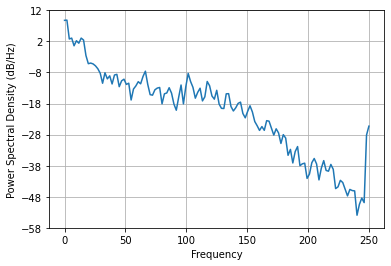

In [136]:
plt.psd(eeglist, Fs=500.0)

In [137]:
rem1= np.zeros((799,1),dtype=np.double)
for i in range(len(Arr)-1):
    rem1[i] = Arr[i+1]-Arr[i]
    print (rem1[i])

[1.2262]
[-0.7094]
[0.5217]
[-0.3872]
[0.3345]
[-0.2643]
[0.2475]
[-0.1994]
[0.1972]
[-0.1592]
[0.1644]
[-0.132]
[0.1414]
[-0.1123]
[0.1243]
[-0.0973]
[0.1111]
[-0.0855]
[0.1005]
[-0.0761]
[0.092]
[-0.0683]
[0.0849]
[-0.0618]
[0.079]
[-0.0563]
[0.0738]
[-0.0515]
[0.0693]
[-0.0474]
[0.0656]
[-0.0438]
[0.0621]
[-0.0406]
[0.0591]
[-0.0377]
[0.0564]
[-0.0351]
[0.0539]
[-0.0328]
[0.0517]
[-0.0307]
[0.0498]
[-0.0289]
[0.048]
[-0.0272]
[0.0463]
[-0.0255]
[0.0448]
[-0.0241]
[0.0434]
[-0.0227]
[0.042]
[-0.0214]
[0.0408]
[-0.0202]
[0.0396]
[-0.0191]
[0.0386]
[-0.0181]
[0.0376]
[-0.0171]
[0.0366]
[-0.0162]
[0.0358]
[-0.0154]
[0.035]
[-0.0146]
[0.0342]
[-0.0138]
[0.0334]
[-0.0131]
[0.0328]
[-0.0125]
[0.0321]
[-0.0118]
[0.0315]
[-0.0112]
[0.0309]
[-0.0106]
[0.0303]
[-0.01]
[0.0298]
[-0.0096]
[0.0293]
[-0.009]
[0.0287]
[-0.0085]
[0.0283]
[-0.0081]
[0.0279]
[-0.0077]
[0.0274]
[-0.0072]
[0.027]
[-0.0068]
[0.0266]
[-0.0064]
[0.0262]
[-0.006]
[0.0258]
[-0.0057]
[0.0255]
[-0.0053]
[0.0252]
[-0.005]
[0.02

IndexError: index 799 is out of bounds for axis 0 with size 799

In [156]:
alleeglist=list(feat['eeg'])


In [158]:
alleeglist

[array([[  2.22439746,  12.40451933,  16.29568013, ...,  -9.24469154,
          -9.9896288 ,  -8.70436973],
        [  1.16234821,  16.03903701,  11.79997144, ..., -19.17138011,
         -18.60810415, -20.03814942],
        [ -3.15670211,  22.32231609,  21.16044956, ..., -23.35687836,
         -24.82931532, -30.93100175],
        ...,
        [  1.67895341,  18.00330408,  24.02963062, ..., -13.37994083,
         -14.26248493, -15.15058987],
        [  0.17684534,  13.32030304,  20.01342675, ..., -12.12518292,
         -13.65581333, -13.08131605],
        [ -1.88566914,   6.71553289,  17.52603643, ...,  -2.36627841,
          -5.00527078,  -6.69288661]]),
 array([[ 2.00449865, -3.52494773, -2.60010606, ...,  9.58576176,
         13.67587567, 12.10997317],
        [ 1.62827261, -4.62605107, -9.64803321, ...,  1.59899981,
          3.48575901,  4.03963942],
        [ 8.51867718,  9.75661818,  8.44551595, ..., -2.63290071,
          4.4660282 ,  7.11697988],
        ...,
        [ 5.959595

(array([1.57855425e-01, 2.99426609e-01, 2.56100803e-01, 1.99064260e-01,
        1.42254031e-01, 9.43820816e-02, 5.78784424e-02, 3.16641490e-02,
        1.42236294e-02, 4.52092365e-03, 1.16481956e-03, 1.75933977e-03,
        3.51471455e-03, 4.48348774e-03, 4.18456695e-03, 3.18569410e-03,
        2.23400951e-03, 1.70448608e-03, 1.58525486e-03, 1.71286227e-03,
        1.94256191e-03, 2.18446248e-03, 2.38889752e-03, 2.53918688e-03,
        2.64938265e-03, 2.75957214e-03, 2.93292321e-03, 3.24503826e-03,
        3.74601887e-03, 4.40175128e-03, 5.05772860e-03, 5.47024627e-03,
        5.41096409e-03, 4.80218343e-03, 3.80832666e-03, 2.81044016e-03,
        2.24148236e-03, 2.35297622e-03, 3.05656216e-03, 3.95906229e-03,
        4.58205736e-03, 4.62420170e-03, 4.09921388e-03, 3.28063332e-03,
        2.51620607e-03, 2.04006433e-03, 1.88401120e-03, 1.91332699e-03,
        1.94170719e-03, 1.84565926e-03, 1.61196593e-03, 1.30448991e-03,
        9.94231990e-04, 7.14414407e-04, 4.66935777e-04, 2.547264

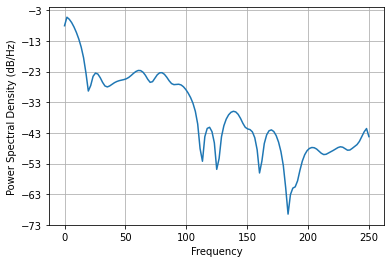

In [166]:
plt.psd(alleeglist[0], Fs=500.0)

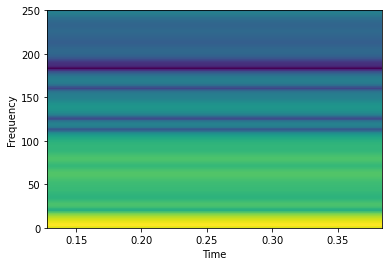

In [168]:
plot.specgram(alleeglist[0],Fs=500.0)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()